In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataf = pd.read_csv("/share/data/school_choice/Data/Cleaned/student_1920.csv", sep=",")
dataf.head(10)

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
0,0,10019435,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,...,0.204972,0.101064,0.387407,0.066313,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10031302,"[815, 559, 439, 559, 785]","[1, 2, 3, 4, 5]","['CA', 'BA', 'CA', 'CA', 'CA']",13,"[0.40869254941208505, 0.259257627732611, 0.231...",0.006416,0.0,37.708783,...,0.517824,0.490157,0.629132,0.619612,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10033269,[764],[1],['CA'],13,[0.996115733080247],0.229133,0.0,37.734997,...,0.754253,0.938095,0.932494,0.822137,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10034607,"[815, 853]","[1, 2]","['CA', 'CA']",13,"[0.346680243635614, 0.013923836320173]",0.373381,0.0,37.709339,...,0.411856,0.417219,0.684535,0.671444,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10034799,"[559, 725, 785]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.386016426419183, 0.841100588083223, 0.01709...",0.424068,0.0,37.781808,...,0.560976,0.800353,0.815533,0.840754,NaN,NaN,NaN,NaN,NaN,NaN
5,5,10036346,[725],[1],['GE'],12,[0.3524225273301121],0.604200,0.0,37.731301,...,0.865119,0.945841,0.912961,0.789762,NaN,NaN,NaN,NaN,NaN,NaN
6,6,10037570,"[725, 785, 697, 815]","[1, 2, 3, 4]","['CA', 'CA', 'CA', 'CA']",13,"[0.9660791892312659, 0.9618670443541801, 0.168...",0.031473,0.0,37.768764,...,0.000000,0.048387,0.275344,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,7,10037645,[405],[1],['GE'],12,[0.250883559549645],0.445316,0.0,37.709438,...,0.256718,0.336986,0.655440,0.643076,NaN,NaN,NaN,NaN,NaN,NaN
8,8,10037766,"[405, 439]","[1, 2]","['GE', 'GE']",12,"[0.457975617054178, 0.17807397545462197]",0.003786,0.0,37.728024,...,0.166215,0.251825,0.639052,0.499911,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10038296,"[439, 405]","[1, 2]","['GE', 'GE']",12,"[0.638786218310657, 0.864228362024592]",0.001505,0.0,37.708563,...,0.256718,0.336986,0.655440,0.643076,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mean_AALPI = np.mean(dataf["AALPI Score"])
mean_AALPI

0.3600936886099679

In [4]:
print(dataf.columns)

Index(['Unnamed: 0', 'studentno', 'r1_ranked_idschool', 'r1_listed_ranks',
       'r1_programs', 'grade', 'r1_randomnumber', 'randomnumber',
       'requestprogramdesignation', 'latitude', 'longitude',
       'r2_ranked_idschool', 'r2_listed_ranks', 'r2_programs',
       'r2_randomnumber', 'r1_idschool', 'r1_programcode', 'r1_rank',
       'r1_isdesignation', 'r1_distance', 'ctip1', 'idschoolattendance',
       'r2_idschool', 'r2_programcode', 'r2_rank', 'r2_isdesignation',
       'r2_distance', 'zipcode', 'sex', 'speced', 'ethnicity_desc',
       'disability', 'homelang_desc', 'englprof_desc', 'enrolled_idschool',
       'resolved_ethnicity', 'math_scalescore', 'ela_scalescore',
       'final_school', 'num_ranked', 'census_block', 'freelunch_prob',
       'reducedlunch_prob', 'census_blockgroup', 'census_tract', 'HOCidx1',
       'HOCidx2', 'HOCidx3', 'AALPI Score', 'Academic Score',
       'N'hood SES Score', 'FRL Score', 'sibling', 'currentlpsibling',
       'currentlp', 'msf', 'aap

In [5]:
#Metric 1 for Socioeconomic diversity is Representativeness
# Ensure schools' average SES is within x% of district average
dataf["N'hood SES Score"]

0        0.387407
1        0.629132
2        0.932494
3        0.684535
4        0.815533
           ...   
15569    0.912961
15570         NaN
15571    0.512252
15572         NaN
15573    0.927495
Name: N'hood SES Score, Length: 15574, dtype: float64

In [6]:
dataf.groupby("census_tract").count()

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
census_tract,,,,,,,,,,,,,,,,,,,,,
6.075010e+09,36,36,33,33,33,36,33,36,36,36,...,36,36,36,36,4,0,0,7,0,8
6.075010e+09,25,25,21,21,21,25,21,25,25,25,...,25,25,25,25,2,0,0,2,0,6
6.075010e+09,31,31,30,30,30,31,30,31,31,31,...,31,31,31,31,3,0,0,6,0,8
6.075010e+09,32,32,31,31,31,32,31,32,32,32,...,32,32,32,32,3,0,2,10,0,5
6.075010e+09,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,6,0,0,3,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.075062e+09,93,93,87,87,87,93,87,93,93,93,...,93,93,93,93,11,0,0,16,0,5
6.075980e+09,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,0,0,0,1,0,0
6.075981e+09,21,21,20,20,20,21,20,21,21,21,...,21,21,21,21,3,1,1,3,0,2


In [7]:
#Metric 2 for Socioeconomic diversity is Limited Isolation
# Ensure that each schools' fraction of socioeconomically disadvantaged students (SED) is at most x% 
dataf.groupby("census_tract").mean()["N'hood SES Score"]

census_tract
6.075010e+09    0.577771
6.075010e+09    0.329193
6.075010e+09    0.417691
6.075010e+09    0.355596
6.075010e+09    0.470624
                  ...   
6.075062e+09    0.275997
6.075980e+09    0.606021
6.075981e+09    0.958967
6.075981e+09    0.860153
6.075981e+09    0.492500
Name: N'hood SES Score, Length: 194, dtype: float64

In [8]:
dataf.groupby(["ctip1"]).count()

,Unnamed: 0,studentno,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,...,AALPI Score,Academic Score,N'hood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa
ctip1,,,,,,,,,,,,,,,,,,,,,
0.0,12993,12993,12130,12130,12130,12993,12130,12993,12993,12987,...,12205,12205,12205,12205,1955,38,424,2291,117,2642
1.0,2581,2581,2404,2404,2404,2581,2404,2581,2581,2579,...,2433,2433,2433,2433,387,16,138,408,37,168


In [9]:
#Metric 3 for Socioeconomic diversity is exposure 
# Ensure that each schools' fraction of socioeconomically disadvantaged students is at least x% 

In [10]:
#Metric 1 of Racial diversity is Race and SES
#Ensure that at most x% of AALPI are assigned in any school with fraction of SED higher than y%

In [11]:
dataf["ctip1"].value_counts()

0.0    12993
1.0     2581
Name: ctip1, dtype: int64

In [12]:
dataf["homelang_desc"]

0        EN-English
1        SP-Spanish
2        EN-English
3        SP-Spanish
4        EN-English
            ...    
15569           NaN
15570           NaN
15571           NaN
15572           NaN
15573           NaN
Name: homelang_desc, Length: 15574, dtype: object

In [13]:
dataf["homelang_desc"].value_counts()

EN-English                       4045
SP-Spanish                       1770
CC-Chinese Cantonese             1690
CM-Chinese Mandarin               228
IV-Vietnamese                     161
FT-Filipino Tagalog               105
TS-Chinese (Toishanese)            90
AR-Arabic                          81
JA-Japanese                        67
RU-Russian                         67
OT-Other Non-English Language      37
KO-Korean                          23
TH-Thai                            21
FR-French                          21
UR-Unknown                         19
HI-Hindi (India)                   17
BU-Burmese                         16
PO-Portuguese                      16
CO-Chinese Other                   13
OA-Other Asian                     12
SA-Samoan                          10
AH-Amharic (Ethiopia)               9
GE-German                           8
IT-Italian                          8
CA-Kmer                             8
BG-Belgian                          8
SD-Swedish  

In [14]:
dataf["englprof_desc"].value_counts()

E-English            3642
L-Limited English    1989
R-Redesignated       1979
P-Pending             996
F-Fluent              449
N-Non English          25
Name: englprof_desc, dtype: int64

In [15]:
group_ethnicity = dataf["resolved_ethnicity"].value_counts()
group_ethnicity

Hispanic/Latino                      2546
Chinese                              2410
White                                1298
Decline to State                      845
Two or More Races                     767
Black or African American             556
Filipino                              227
Vietnamese                            224
Middle Eastern/Arabic                 116
Other Asian                           116
Asian Indian                           94
Japanese                               64
Korean                                 55
Samoan                                 28
American Indian or Alaskan Native      22
Cambodian                              16
Hawaiian                               13
Other Pacific Islander                  9
500                                     2
Hmong                                   2
Guamanian                               2
Laotian                                 1
Tahitian                                1
Name: resolved_ethnicity, dtype: i

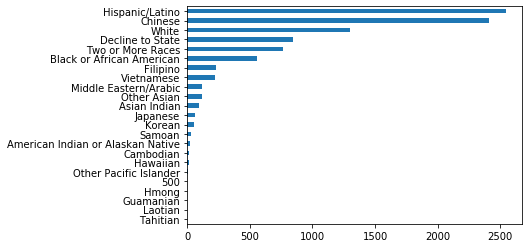

In [16]:
dataf.resolved_ethnicity.value_counts().sort_values().plot(kind = 'barh')

In [17]:
df = pd.read_csv("~/displacement-typologies/data/outputs/typologies/SanFrancisco_typology_output.csv", sep=",")
df.head(10)

,Unnamed: 0,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,...,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,0,2772.0,1388.0,1108.0,55125.0,640600.0,36856.0,1185.0,99.0,2014.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,1,4127.0,2874.0,1550.0,100202.0,718900.0,47042.0,1829.0,132.0,2919.0,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
2,2,722.0,396.0,37.0,6953.0,-666666666.0,-222222222.0,394.0,362.0,699.0,...,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
3,3,5070.0,3335.0,2045.0,40733.0,321000.0,38985.0,910.0,131.0,3501.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
4,4,3338.0,1900.0,1628.0,33194.0,328400.0,35481.0,952.0,47.0,2257.0,...,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
5,5,4626.0,1591.0,2057.0,27663.0,275900.0,56460.0,826.0,69.0,2933.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
6,6,2450.0,2123.0,929.0,54745.0,316000.0,25676.0,1124.0,65.0,1646.0,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
7,7,5908.0,4764.0,2692.0,94853.0,495900.0,55770.0,1473.0,153.0,4672.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
8,8,3471.0,2451.0,1574.0,60870.0,410200.0,30194.0,1048.0,126.0,2410.0,...,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
9,9,2691.0,2230.0,1176.0,122000.0,562900.0,26533.0,2250.0,1453.0,2211.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']


In [18]:
df["GEOID"]

0       6055200202
1       6055200400
2       6055200900
3       6067006101
4       6067006102
           ...    
2104    6055201401
2105    6055201402
2106    6055201403
2107    6055201601
2108    6055201602
Name: GEOID, Length: 2109, dtype: int64

In [19]:
#SAE: Stable Advanced Exclusive Typology
#AdvG: Advanced Gentrification Typology
#ARE: At Risk of Being Exclusive Typology
#BE: Becoming Exclusive
#SMMI: Stable Middle/Moderate Income
#ARG: At Risk of Gentrification
#EOG: Early Ongoing Gentrification
#OD: Ongoing Displacement
cols = {"SAE": None, "AdvG": None, "ARE": None, "BE": None, "SMMI": None, "ARG": None, "EOG": None, "OD": None}
filtered_df = df[cols]
filtered_df.head(20)

,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [20]:
filtered_df["SAE"].value_counts()

0.0    1875
1.0     229
Name: SAE, dtype: int64

In [21]:
filtered_df["AdvG"].value_counts()

0.0    2034
1.0      75
Name: AdvG, dtype: int64

In [22]:
filtered_df["ARE"].value_counts()

0.0    1770
1.0     339
Name: ARE, dtype: int64

In [23]:
filtered_df["BE"].value_counts()

0.0    1997
1.0     105
Name: BE, dtype: int64

In [24]:
filtered_df["SMMI"].value_counts()

0.0    1441
1.0     668
Name: SMMI, dtype: int64

In [25]:
filtered_df["ARG"].value_counts()

0.0    2020
1.0      89
Name: ARG, dtype: int64

In [26]:
filtered_df["EOG"].value_counts()

0.0    2085
1.0      20
Name: EOG, dtype: int64

In [27]:
filtered_df["OD"].value_counts()

0    2061
1      48
Name: OD, dtype: int64

In [28]:
for key in cols: 
    new_val = len(filtered_df[filtered_df[key] == 1][key])
    cols[key] = new_val

In [29]:
dataf["census_blockgroup"]

0        6.075031e+10
1        6.075026e+10
2        6.075023e+10
3        6.075026e+10
4        6.075016e+10
             ...     
15569    6.075023e+10
15570             NaN
15571    6.075048e+10
15572             NaN
15573    6.075061e+10
Name: census_blockgroup, Length: 15574, dtype: float64

In [30]:
dataf["census_tract"]

0        6.075031e+09
1        6.075026e+09
2        6.075023e+09
3        6.075026e+09
4        6.075016e+09
             ...     
15569    6.075023e+09
15570             NaN
15571    6.075048e+09
15572             NaN
15573    6.075061e+09
Name: census_tract, Length: 15574, dtype: float64

In [32]:
step1_df = dataf.merge(df, left_on = "census_tract", right_on = "GEOID")
new_df = step1_df[["GEOID", "SAE", "AdvG", "ARE", "BE", "SMMI", "ARG", "EOG", "OD"]]
new_df = new_df.drop_duplicates()
new_df.head(30)

,GEOID,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD
0,6075030700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
191,6075026200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
416,6075023103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
623,6075026303,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
763,6075016100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
897,6075023102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1032,6075017000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1064,6075031302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1186,6075025600,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1327,6075020402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [33]:
new_df["SAE"].value_counts()[1]

16

In [112]:
frequencies = {}
for col in new_df.columns: 
    if col != "GEOID": 
        frequencies[col] = new_df[col].value_counts()[1]
col_names = sorted(frequencies, key=frequencies.get)
frequencies_list = sorted(frequencies.values())
frequencies_list

[2, 4, 9, 16, 24, 29, 32, 58]

In [113]:
col_names

['ARG', 'EOG', 'OD', 'SAE', 'ARE', 'BE', 'AdvG', 'SMMI']

In [114]:
frequencies

{'SAE': 16,
 'AdvG': 32,
 'ARE': 24,
 'BE': 29,
 'SMMI': 58,
 'ARG': 2,
 'EOG': 4,
 'OD': 9}

<BarContainer object of 8 artists>

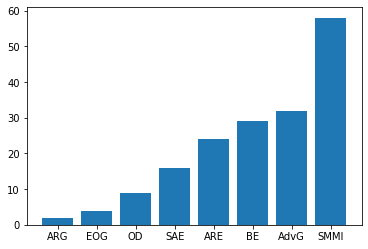

In [117]:
plt.bar(col_names, frequencies_list)

In [87]:
ctip1_df = step1_df[step1_df["ctip1"] == 1]
ctip1_df = ctip1_df[["GEOID", "SAE", "AdvG", "ARE", "BE", "SMMI", "EOG", "OD"]]
ctip1_df = ctip1_df.drop_duplicates()

In [118]:
new_frequencies = {}
for col in ctip1_df.columns: 
    if col != "GEOID": 
        new_frequencies[col] = ctip1_df[col].value_counts()[1]

col_names = sorted(new_frequencies, key=new_frequencies.get)
frequency_list = sorted(new_frequencies.values())
frequency_list

[3, 4, 4, 5, 5, 9, 17]

In [119]:
col_names

['SAE', 'EOG', 'OD', 'ARE', 'BE', 'SMMI', 'AdvG']

In [120]:
new_frequencies

{'SAE': 3, 'AdvG': 17, 'ARE': 5, 'BE': 5, 'SMMI': 9, 'EOG': 4, 'OD': 4}

<BarContainer object of 7 artists>

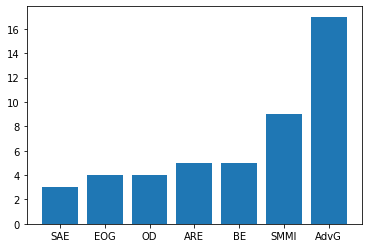

In [121]:
plt.bar(col_names, frequency_list)